In [5]:
from matplotlib import rc
rc('animation', html='jshtml')

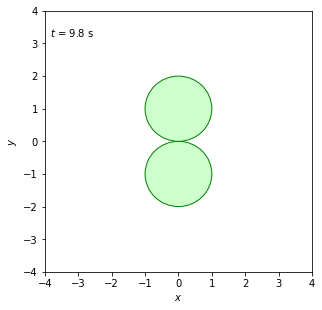

In [6]:
# Import required libraries
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Ellipse
from butiran.vect3 import Vect3

# Set parameters for plotting
p = ['000000.gif']

# Create array for time t from tbed to tend with step dt
tbeg = 0
tend = 10
T = tend - tbeg
Nt = 40
dt = T/Nt
t = np.arange(tbeg, tend + dt, dt)

# Define 1st collony
R1 = 1
r1 = Vect3(0, 0, R1)
m1 = 1

# Define 2nd collony
R2 = 1
r2 = Vect3(0, 0, -R2)
m2 = 1

#	Caculate r dan R vectors
r = Vect3.sub(r2, r1)
Rnum = Vect3.add(Vect3.mul(m1, r1), Vect3.mul(m2, r2))
Rden = m1 + m2
R = Vect3.div(Rnum, Rden)

# Define size due to perspective in z direction
def sizep(d, z):
	c = 0
	d = d * (1 + c * z)
	return d

# Set range of x and y
rx = [-4, 4, 1]
ry = [-4, 4, 1]
xmt = np.arange(rx[0], rx[1] + rx[2], rx[2])
ymt = np.arange(ry[0], ry[1] + ry[2], ry[2])

# Get figure for plotting and set it
fig = plt.figure(figsize=[4.4, 4.2])

# Configure axes
ax = fig.add_subplot()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim([rx[0], rx[1]])
ax.set_ylim([ry[0], ry[1]])
#ax.grid(which='both')
ax.grid(False)
ax.set_xticks(xmt, minor=True)
ax.set_yticks(ymt, minor=True)

# It must be set after configuring axis to give the effect
fig.tight_layout(rect=[-0.01, -0.01, 1.03, 1.04])

# Prepare curve
line, = ax.plot([], [], 'or-', lw=2, ms=0)
time_template = '$t$ = %.1f s'
time_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

g1 = Ellipse(
	(r1.x, r1.y), 2 * R1, 2 * R1,
	edgecolor='g', fc='#cfc', lw=1
)
ax.add_patch(g1)
g2 = Ellipse(
	(r2.x, r2.y), 2 * R2, 2 * R2,
	edgecolor='g', fc='#cfc', lw=1
)
ax.add_patch(g2)

# Set initial position
X0 = R.x 
Y0 = R.y 
Z0 = R.z 
#theta0 = np.pi / 4
theta0 = 0
phi0 = 0
r0 = r

#	Set kinematic velocities
Xdot = 0 #Vx
Ydot = 0  #Vy
Zdot = 0  #Vz
thetadot = 0
phidot = 0
#phidot = 2 * np.pi / T

# Perform animation
def init():
	line.set_data([], [])
	time_text.set_text('')
	return line, time_text

def animate(i):
	tt = (i - 1) * dt
	
	X = X0 + Xdot * tt
	Y = Y0 + Ydot * tt
	Z = Z0 + Zdot * tt
	theta = theta0 + thetadot * tt
	phi = phi0 + phidot * tt
	
	l = r0.len()
	
	x = l * sin(theta) * sin(phi)
	y = l * cos(theta)
	z = l * sin(theta) * cos(phi)

	R = Vect3(X, Y, Z)
	r = Vect3(x, y, z)

	beta = m2 / (m1 + m2)
	
	r1 = Vect3.sub(R, Vect3.mul(beta, r))
	r2 = Vect3.add(R, Vect3.mul(1 - beta, r))
	
	g1.center = r1.x, r1.y
	g2.center = r2.x, r2.y
	
	s1 = sizep(2 * R1, r1.z)
	g1.width = s1
	g1.height = s1
	
	s2 = sizep(2 * R2, r2.z)
	g2.width = s2
	g2.height = s2
	
	if r2.z > r1.z:
		g1.xorder = 2
		g2.xorder = 3
	else:
		g1.xorder = 3
		g2.xorder = 2
	
	time_text.set_text(time_template % tt)
	
	return line, time_text

ani = animation.FuncAnimation(
	fig, animate, np.arange(1, len(t)),
	interval=70, blit=True, init_func=init
)

# Write to to a GIF animation
writergif = animation.PillowWriter(fps=10)
ani.save(p[0], writer=writergif)
